<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dateien ablegen, um sie in Sitzungsspeicher hochzuladen
Laufwerk
83.52 GB verfügbar
Datensatz vorbereiten - Dummies, Skalen
Im ersten Schritt wird der Datensatz aus dem ersten Notebook unter dem Namen 'maindf' geladen. Hier muss der Datensatz "1_Cleansing_Join" aus dem vorherigen Notebook reingeladen werden.

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2_Data_for_Modeltraining.csv")
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & ML/Projekt/1_Cleansing_Join_final.csv')

Mounted at /content/drive




> Durch Ausgabe des Dataframes maindf können wir unseren aktuellen, über Google Drive in colab geladenen Datensatz einsehen.


In [3]:
maindf

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
0,0,342,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,737,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,7,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,14,2015,7,1,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90909,0,21,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90910,0,23,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90911,0,34,2017,8,31,7,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
90912,0,109,2017,8,31,7,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# **Vorbereitung des Datensatzes auf die Regression**



> Wir möchten durch eine Regression die 'average daily rate', also wie teuer ein Zimmer pro Nacht im Schnitt ist, vorhersagen. Dafür müssen wir zuerst aus den Daten die Spalte 'adr' entfernen bzw. diese seperat als y-Variable speichern, da es sich dabei um unsere target-Variable handelt. Durch den Train-Test-Split können wir später das Modell anhand der Trainingsdaten passend auf unsere X- und y-Daten trainieren und über den Abgleich der auf den X-test-Daten vorhergesagten y-Werten zu den tatsächlichen y-test-Daten die Präzision des Modells bestimmen.



> Mit dem Befehl `drop(columns='adr')` entfernen wir die adr-Spalte aus den X-Daten. Wir speichern sie dafür mit `y = maindf.adr`.





In [4]:
X = maindf.drop(columns='adr')
y = maindf.adr



> Anschließend können wir die Daten mit der Funktion `train_test_split()`, die wir erst importieren müssen, in Trainings- und Testdaten aufteilen. Wir wählen hierfür eine Testgröße von 20% und den Random-State 42.



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> Mit diesem Split trainieren wir verschiedene Modelle und prüfen über die Accuracy und den f1-Score, welches Modell für unsere Daten die beste Performance bietet. Wir testen

*   Lineare Regression
*   Support Vector Mechine (LinearSVR)
*   Decision Tree
*   Gradient Boosting
*   XGBoost
*   Neuronale Netze



> Um unsere Ergebnisse vergleichen zu können, definieren wir nun noch eine `evaluate`-Function, die das Bestimmtheitsmaß (R2), den mittleren absoluten Fehler (MAE), den mittleren quadrierten Fehler (MSE), die Quadratwurzel des mittleren quadratischen Fehlers (RMSE) und den Mittlerer absoluter prozentualer Fehler (MAPE):




In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))



> Für die Bewertung der Modelle betrachten wir insbesondere das Bestimmtheitsmaß und den mittleren absoluten Fehler.



## **Lineare Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [8]:
from sklearn.pipeline import make_pipeline

linear_scaled = make_pipeline(scaler, linear)

NameError: ignored

In [ ]:
linear_scaled.fit(X_train, y_train)

In [ ]:
evaluate_lin_reg(linear_scaled, X_test, y_test)

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
import numpy as np

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(scaler, RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

In [ ]:
linear_ridge[1].alpha_

In [ ]:
evaluate_lin_reg(linear_ridge, X_test,y_test)

In [ ]:
maindf.adr.mean()

## **SVM**

Next, we take a look at a support vector machine (SVM) model. Normally, SVMs are used for classification but they can also be applied to regression problems.

`sklearn` provides a SVM regression implementation which we can easily use:

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
lsvr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=42, tol=1e-5))

In [ ]:
lsvr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=42, tol=1e-05))])

In [ ]:
evaluate(lsvr, X_test, y_test)

R2: 0.39195938175867595
MAE: 26.760446916694537
MSE: 1472.649461870278
RMSE: 38.37511513820223
MAPE: 5481775411882708.0


The SVM achieves a pretty good result - significantly better than the regression models.

In [ ]:
y_lsvr_predict = lsvr.predict(X_test)

### **Hyperparameter Tuning**

C: da LinearSVC: andere Parameter wie 'learning_rate' nicht valid.

Die Fehlermeldung "TypeError: Parameter grid for parameter 'C' is not iterable or a distribution (value=1)" deutet darauf hin, dass es ein Problem mit dem angegebenen Parameterraum für den Parameter 'C' gibt. Der Wert '1' allein ist nicht als Parameterraum gültig.

Um das Problem zu beheben, kannst du entweder einen spezifischen Wert oder einen Parameterraum für 'C' angeben. Hier sind zwei Möglichkeiten:

from scipy.stats import uniform

param_grid = {
    'C': uniform(loc=0.1, scale=10),

    Die Wahl zwischen der Verwendung spezifischer Werte und der Verwendung eines Parameterraums hat Vor- und Nachteile, die ich im Folgenden erläutern werde:

Option 1: Spezifische Werte für 'C':
Vorteile:

Einfachheit: Die Verwendung spezifischer Werte ist einfach und erfordert keine weiteren Berechnungen.
Kontrolle: Du hast direkte Kontrolle über die ausgewählten Werte für 'C' und kannst gezielt bestimmte Werte testen.
Nachteile:

Möglicher Informationsverlust: Es besteht die Möglichkeit, dass der optimale Wert für 'C' nicht in den spezifischen Werten enthalten ist. Dies kann dazu führen, dass das Tuning nicht das bestmögliche Ergebnis erzielt.
Option 2: Parameterraum für 'C':
Vorteile:

Flexibilität: Durch die Verwendung eines Parameterraums kannst du einen breiteren Bereich von 'C'-Werten abdecken und somit eine größere Chance haben, den optimalen Wert zu finden.
Automatisierte Suche: Der Hyperparameter-Tuning-Algorithmus (z. B. RandomizedSearchCV) kann den Parameterraum automatisch durchsuchen und die besten Kombinationen finden.
Nachteile:

Komplexität: Die Definition eines Parameterraums erfordert möglicherweise zusätzliche Überlegungen und Kenntnisse über die Wertebereiche von 'C'. Die Auswahl eines geeigneten Parameterraums kann eine gewisse Erfahrung oder Experimentation erfordern.
Berechnungsaufwand: Ein breiterer Parameterraum kann zu einer erhöhten Rechenzeit führen, da der Hyperparameter-Tuning-Algorithmus mehr Kombinationen ausprobieren muss.
Es ist wichtig zu beachten, dass die Vor- und Nachteile von Optionen wie spezifischen Werten oder Parameterräumen stark vom Anwendungsfall und den Eigenschaften des Modells abhängen können. Es empfiehlt sich, verschiedene Optionen auszuprobieren und die Auswirkungen auf die Leistung des Modells zu beobachten, um die besten Hyperparameter-Tuning-Strategien zu ermitteln.

Das Problem tritt auf, weil das übergebene param_grid nicht den richtigen Parameternamen für den LinearSVR-Schätzer enthält. In deinem Fall scheint der LinearSVR in einer Pipeline mit einem StandardScaler-Schritt verwendet zu werden. Daher müssen die Parameter für den LinearSVR in der Form schrittnamen__param_name angegeben werden. In diesem aktualisierten param_grid wurden die Parameter für LinearSVR mit dem Präfix linearsvr__ versehen, um sie dem entsprechenden Schritt in der Pipeline zuzuordnen. Beachte auch, dass der standardscaler als Parameter hinzugefügt wurde, da es ein Schritt in der Pipeline ist und als Option entweder ein StandardScaler-Objekt oder None akzeptiert.



In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'linearsvr__C': [0.1, 1, 10],
    'linearsvr__loss': ['hinge', 'squared_hinge'],
    'linearsvr__max_iter': [100, 500, 1000],
    'linearsvr__tol': loguniform(0.0001, 0.1),
    'linearsvr__dual': [True, False],
    'linearsvr__fit_intercept': [True, False],
    'linearsvr__intercept_scaling': loguniform(0.1, 10),
    'linearsvr__verbose': [0, 1],
    'standardscaler': [StandardScaler(), None],
    'linearsvr__random_state': [42],
    'linearsvr__epsilon': [0.01],
    'linearsvr_error_score=': ['raise'],
}

ht_lsvr = RandomizedSearchCV(lsvr, param_grid, random_state=42, n_iter=10)

In [ ]:
ht_lsvr.fit(X_train, y_train)

ValueError: ignored

Trotz Hyperparameter Tuning richtig schlechte Accuracy => nicht geeignet

In [ ]:
evaluate(ht_lsvr, X_test, y_test)

## **Gradient Boosting**

Let's move on to a gradient boosting model.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
gb = make_pipeline(StandardScaler(),
                   GradientBoostingRegressor(random_state=42))

In [14]:
gb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [15]:
evaluate(gb, X_test, y_test)

R2: 0.6419541401266158
MAE: 20.865622348836478
MSE: 867.1724010683622
RMSE: 29.44779110677679
MAPE: 3956896952791488.0


In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor()

In [ ]:
dummy.fit(X_train, y_train)

In [ ]:
evaluate(dummy, X_test, y_test)

### **Hyperparameter Tuning**

The model's performance appears to be quite promising so let's try to improve that further. For this purpose, we will perform some basic hyperparameter optimizations in a next step.

As expected, the feature importance we find here is similar to the one we found visually in the decision tree.

Again, we first have to define our hyperparameter grid:

In [ ]:
# the algorithm will try out random values from the lists we provide
param_grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
        'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
        'max_depth': [2, 3, 4, 5, 6, 7]}

We'll again be using the random search approach. As you can see from the `CV` suffix this is combined with cross-validation.

In [ ]:
# setting n_jobs=-1 will ensure that sklearn uses all available cpu cores
# takes a loooong time (reduce n_iter to make it faster)
optimized_gb = RandomizedSearchCV(pipeline, param_grid, n_iter=100, n_jobs=-1, random_state=42, cv=5, verbose=1)
optimized_gb.fit(X_train, y_train)

Now that the tuning is done, we can retrieve the best hyperparamter combination as follows:

In [ ]:
optimized_gb.best_params_

And evaluate the model trained using those parameters:

In [ ]:
evaluate(optimized_gb, X_test, y_test)

## **XGB Regression**

In [10]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree
import matplotlib.pyplot as plt

# fit model no training data
xgb = make_pipeline(StandardScaler(),
                    XGBRegressor())
xgb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [11]:
evaluate(xgb, X_test, y_test)

R2: 0.7509161676659613
MAE: 15.697374519474966
MSE: 603.2708352745688
RMSE: 24.56157232903807
MAPE: 3262864847176914.5


Instead of relying on a visual plot to determine the most important features, we can also utilize the `feature_importances_` attribute on the trained sklearn estimator:

In [ ]:
import numpy as np
feature_importance = gb.feature_importances_

# get indices sorted by importance
sorted_idx = np.argsort(feature_importance)

# generate range from 0 to the number of features
pos = np.arange(sorted_idx.shape[0])

# 'pos' acts as our value for the 'y' axis
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

### **Hyperparameter Tuning**

We can now start the tuning process - limited to 100 iterations (100 different hyperparameter combinations). Note that this process can take a while because sklearn will fit the model 5 times (folds) for each iteration resulting in 500 total fits:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
regressor=XGBRegressor()

grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [ ]:
optimized_xgb = random_cv.fit(X_train,y_train)
optimized_xgb_est = random_cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           grow_policy=None,
                                                           i...
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgbregressor__learning_rate': [0.15,
                                                                        0.1,
                                                                        0.05,
                                                                        0.01,
                                                                        0.001],
                                        'xgbregressor__max_depth': [2, 4, 5, 7],
                                        'xgbregressor__n_estimators': [100, 500,
                                                                       750,
                                                                       1000,
                                                                       1250,
                                                                       1500,
                                                                       1750]},
                   random_state=42, verbose=3)

Now that the tuning is done, we can retrieve the best hyperparamter combination as follows:

In [ ]:
optimized_xgb.best_params_

{'xgbregressor__n_estimators': 1250,
 'xgbregressor__max_depth': 7,
 'xgbregressor__learning_rate': 0.05}

sehr guter R^2!! (Hauptargument) und auch verkraftbarer MAE (14,09€)

We can see that there is not a big difference between training and test set deviance which means that our model is not suffering from overfitting (at least not heavily). However, we might choose to stop training after around iteration 20 as the additional iterations only contribute very little to the overall model performance. That being said, we are only looking at an individual hyperparam here so this might not be the true optimal parameter value.

In [ ]:
evaluate(optimized_xgb, X_test, y_test)

R2: 0.7254135497005934
MAE: 13.914807677802278
MSE: 665.0371309730521
RMSE: 25.78831384509371
MAPE: 2951135503632278.0


### **Plotting**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

test_score[i] = best_xgb.loss_(y_test, y_pred) hat nicht funktioniert: loss_ nicht in Pipeline => MSE anders berechnen

In [ ]:
# get best xgb model (after hyperparam tuning)
best_xgb = optimized_xgb.best_estimator_
# staged_predict returns the error after each stage in the model
predictions = best_xgb.predict(X_test)
# how many estimators were used for the model
n_estimators = optimized_xgb.best_params_['xgbregressor__n_estimators']

# calculate deviance (error) for all examples in test set
test_score = np.zeros((n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(predictions):
   mse = mean_squared_error(y_test, predictions)

In [ ]:
train_predictions = xgb.predict(X_train)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, train_mse = mean_squared_error(y_train, train_predictions), 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

SyntaxError: ignored

### **Error Analysis**

In [ ]:
predictions = optimized_xgb.predict(X_test)
maindf_with_predictions = pd.concat([X_test, y_test], axis='columns')
maindf_with_predictions = pd.concat([maindf_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=maindf_with_predictions.index)], axis=1)

Then, we calculate the difference between the prediction and actual value (MAE):

In [ ]:
maindf_with_predictions['pred_diff'] = np.abs(maindf_with_predictions['adr'] - maindf_with_predictions.Prediction)

<Axes: ylabel='Frequency'>

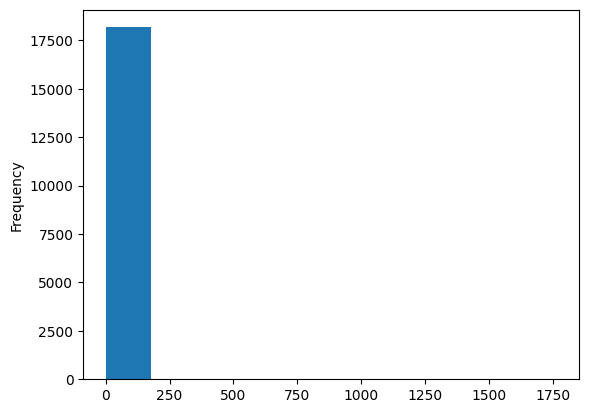

In [ ]:
maindf_with_predictions.pred_diff.plot(kind='hist')

<ipython-input-66-abc9aa1f0b9c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


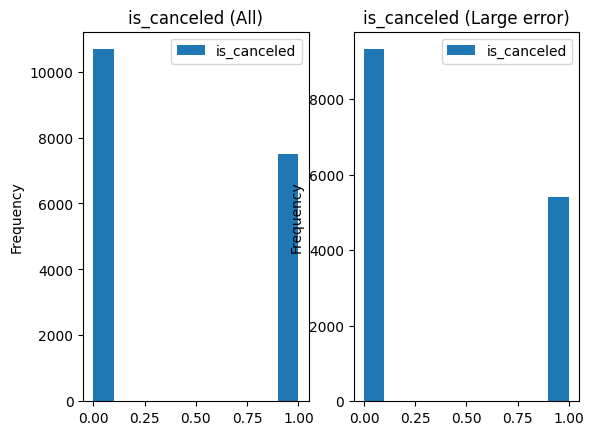

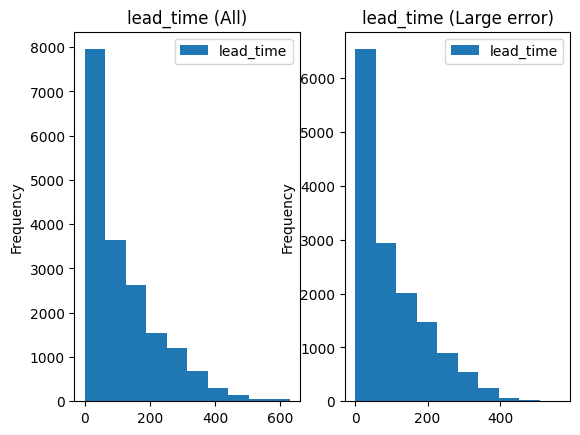

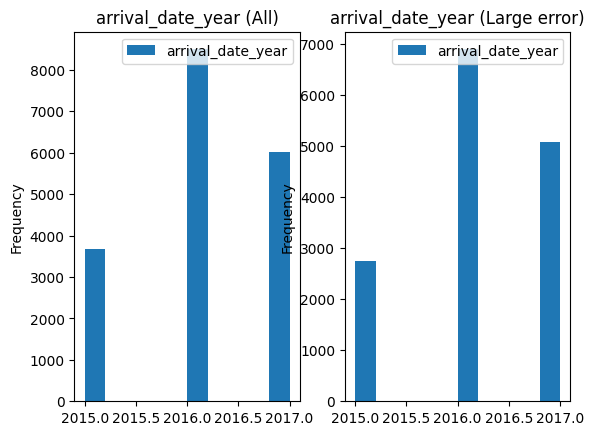

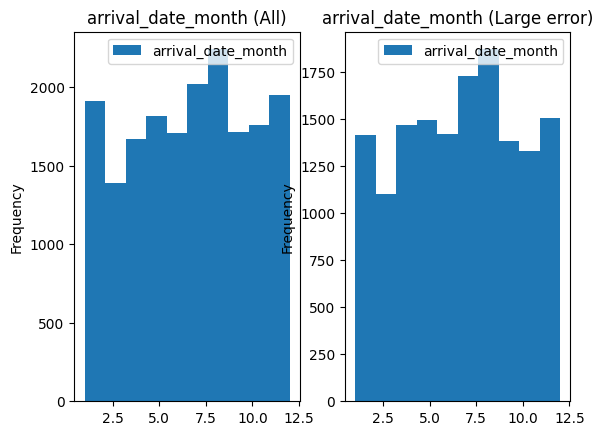

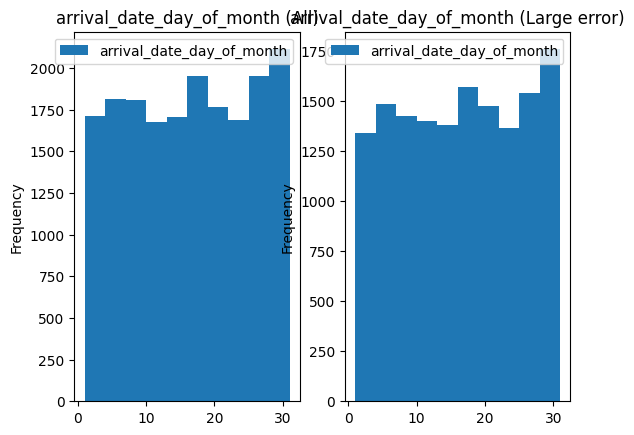

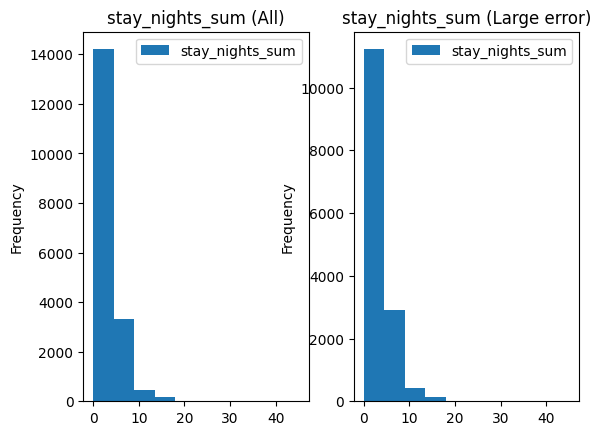

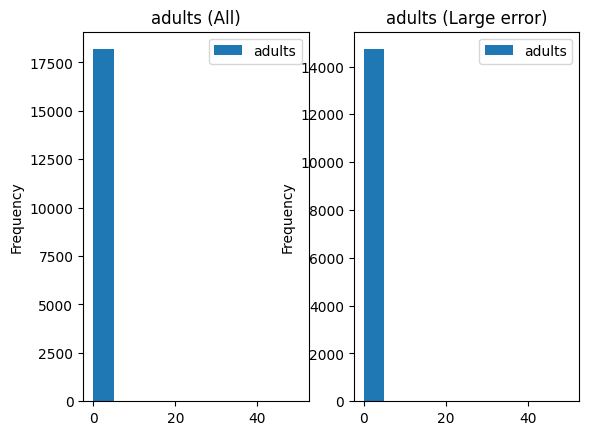

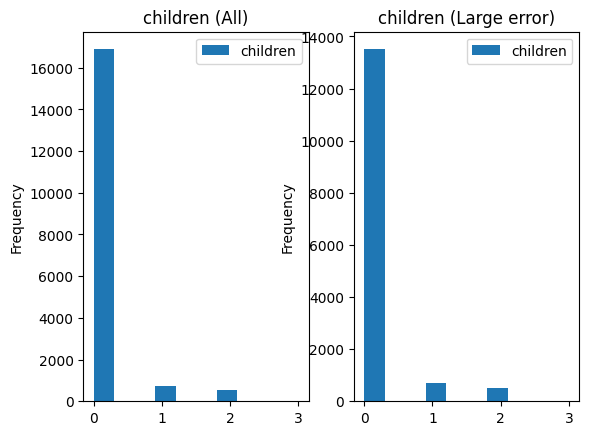

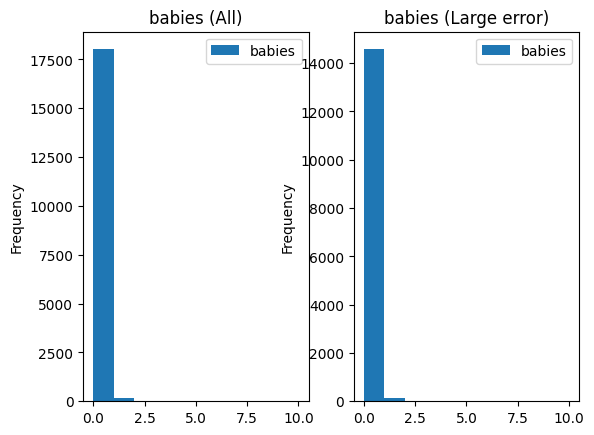

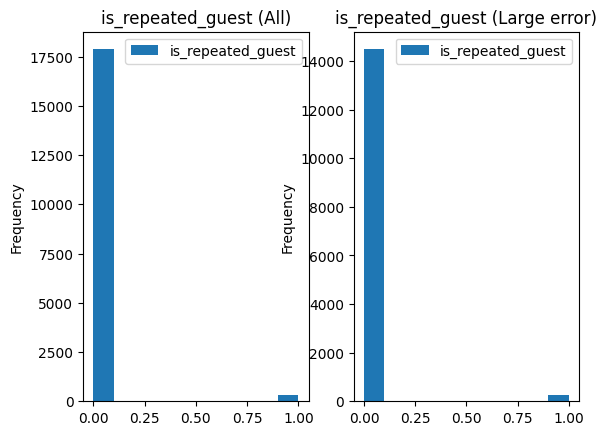

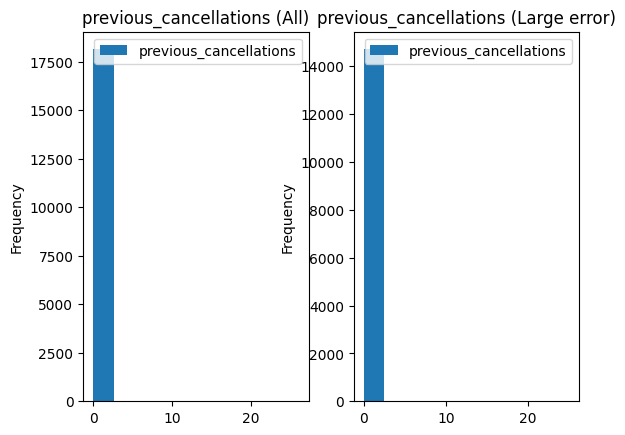

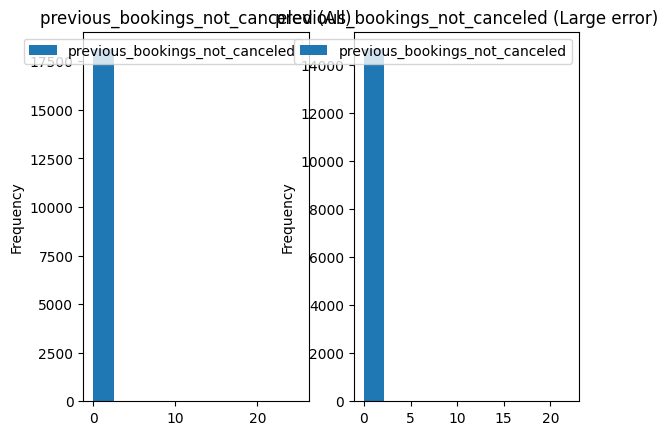

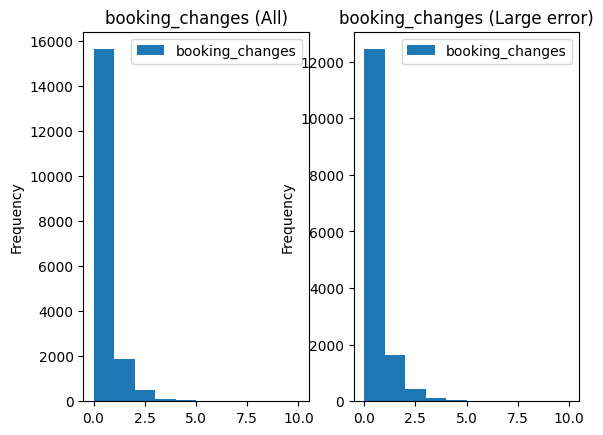

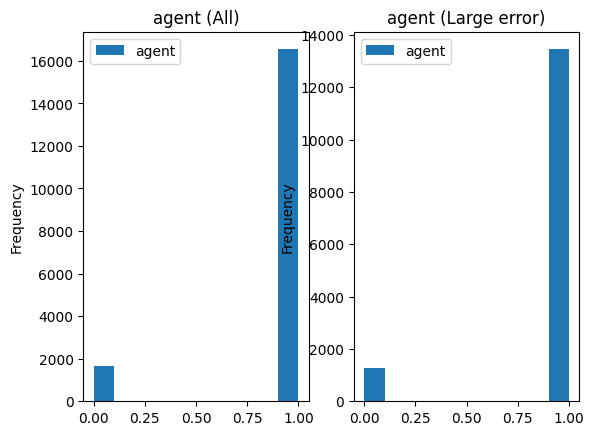

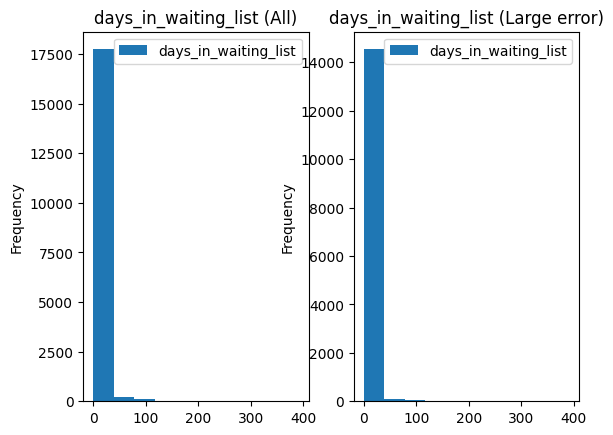

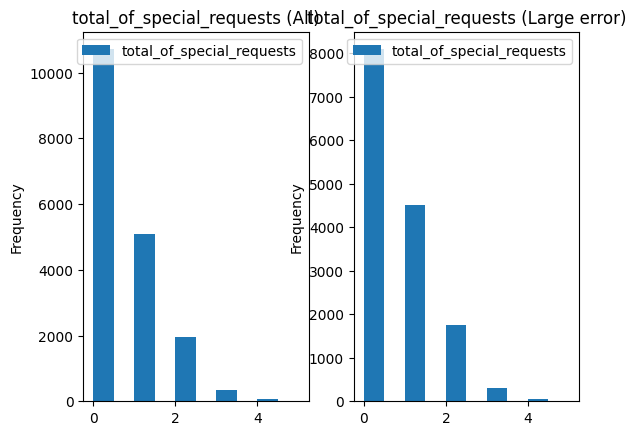

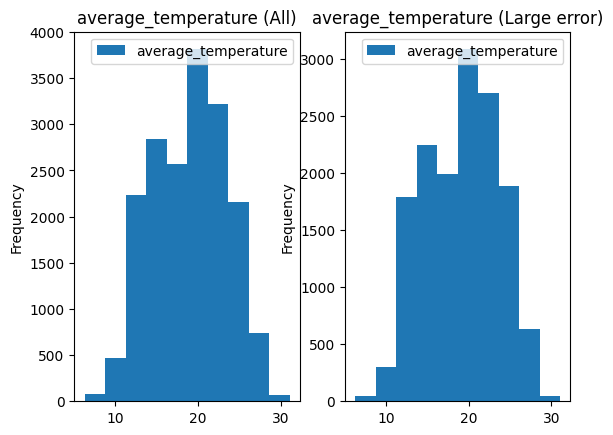

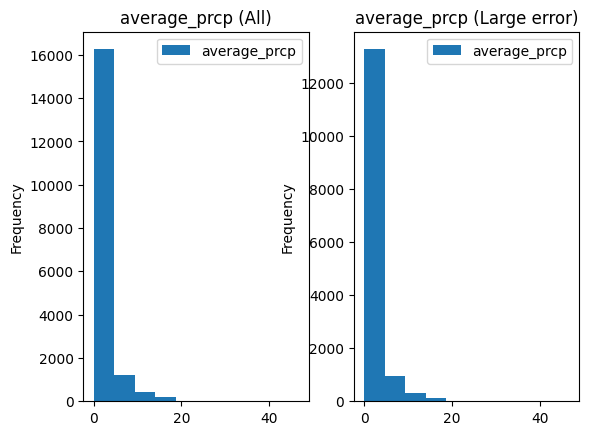

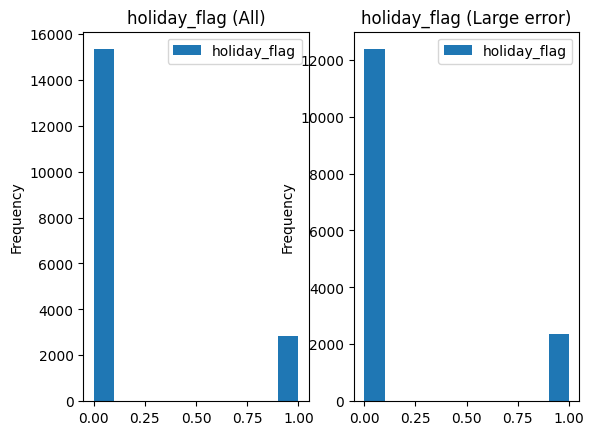

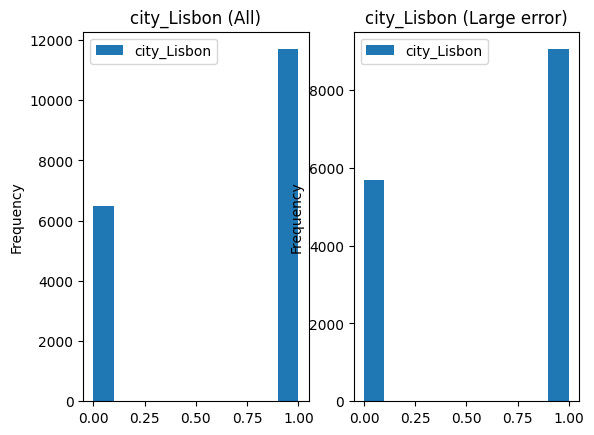

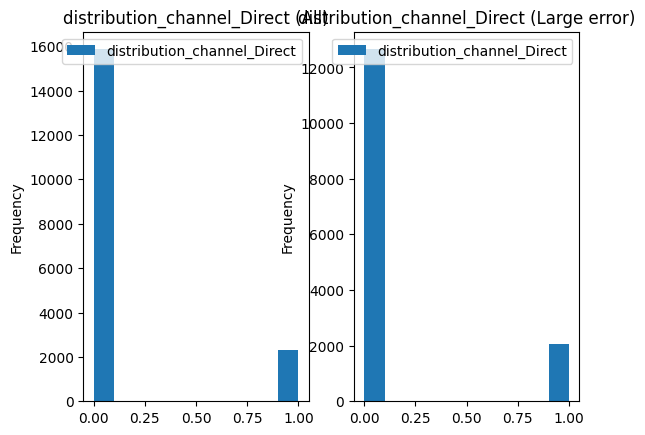

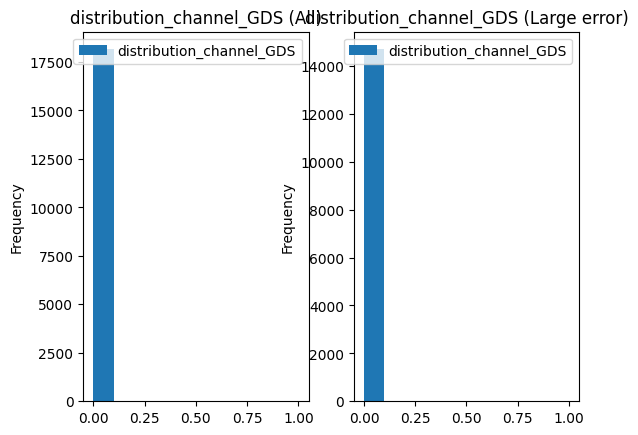

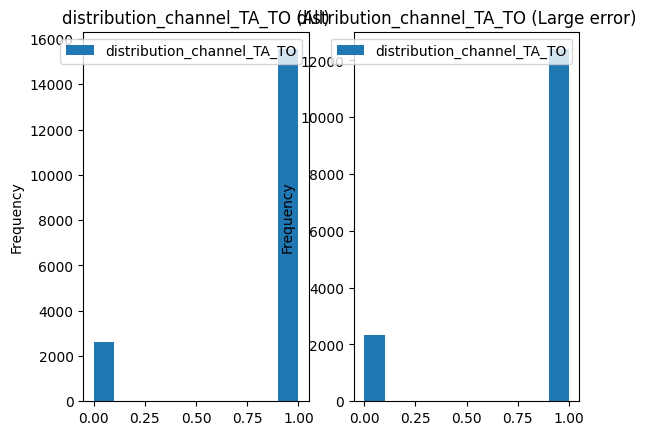

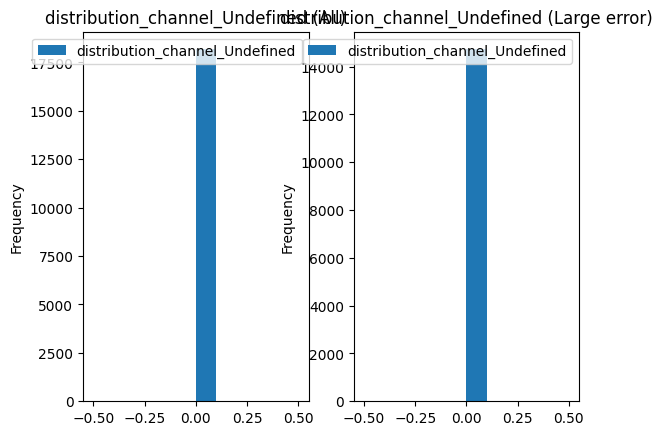

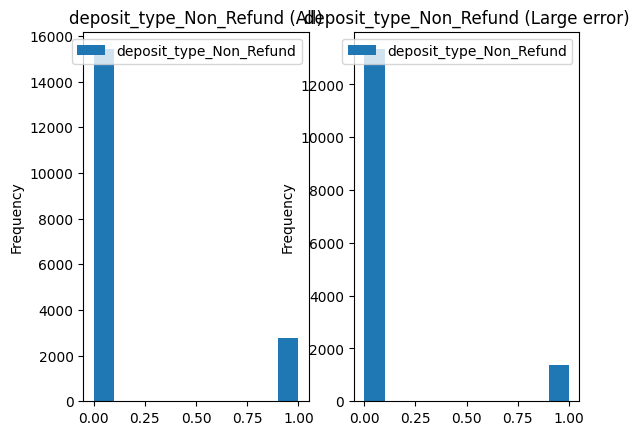

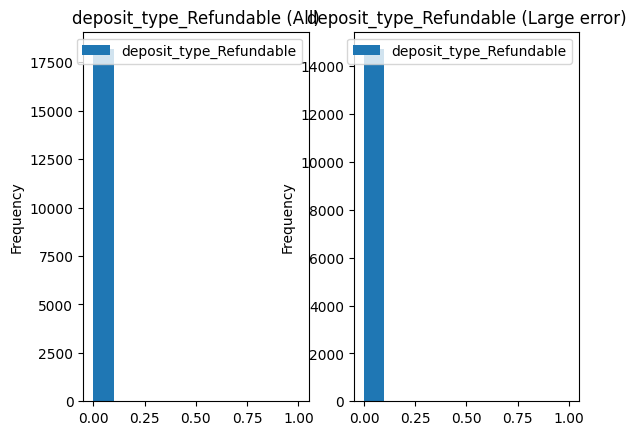

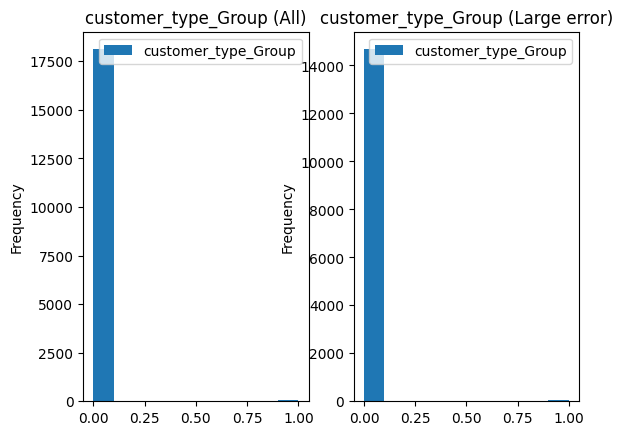

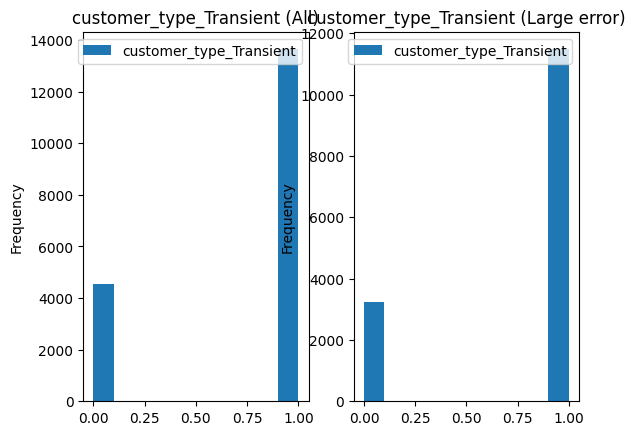

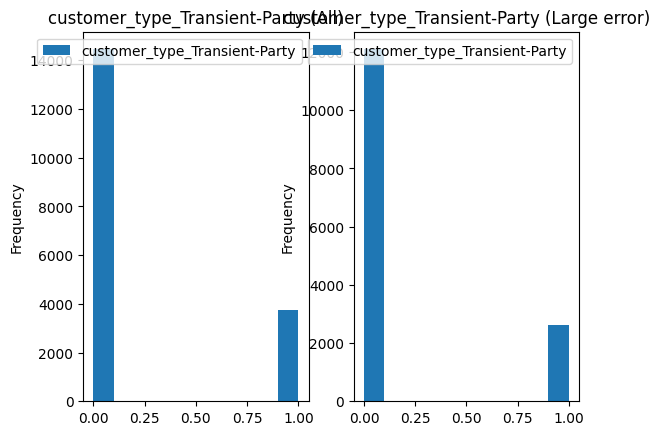

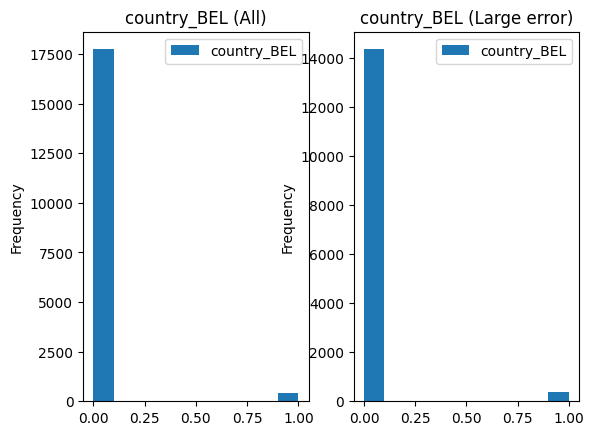

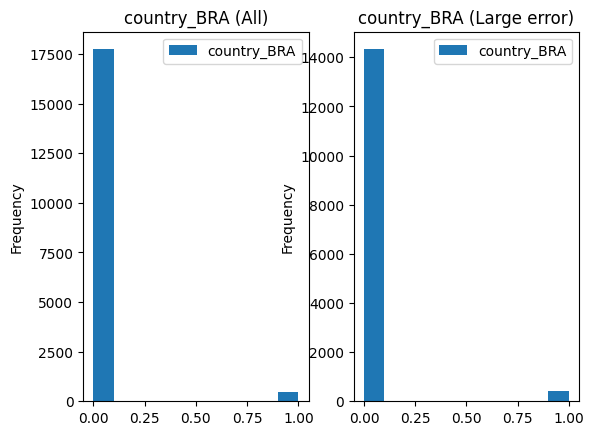

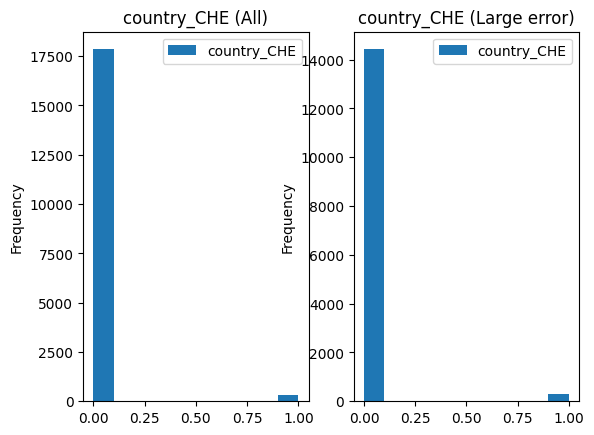

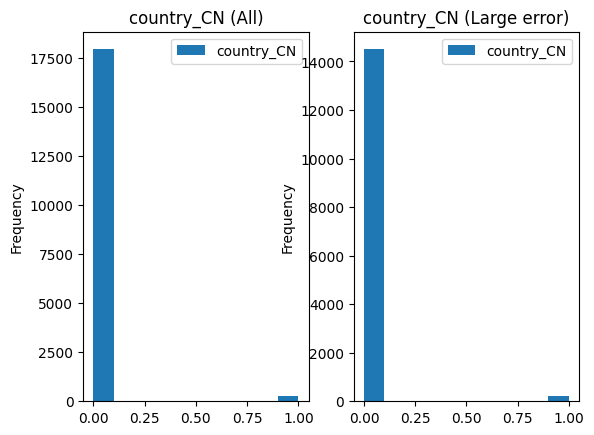

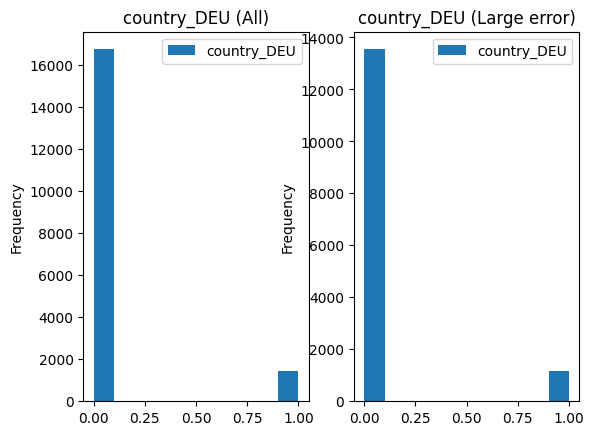

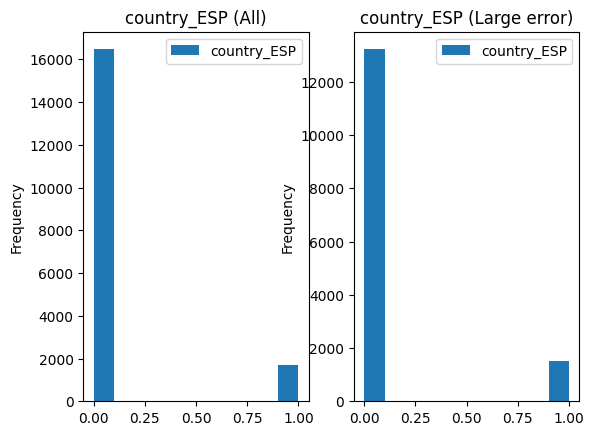

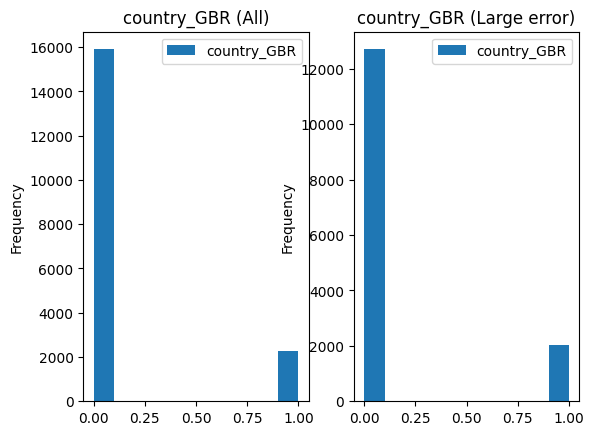

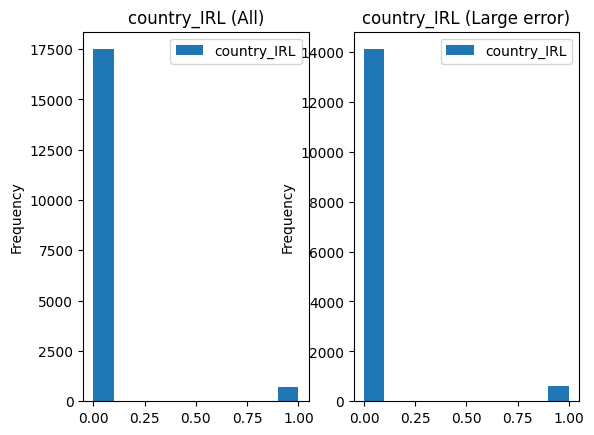

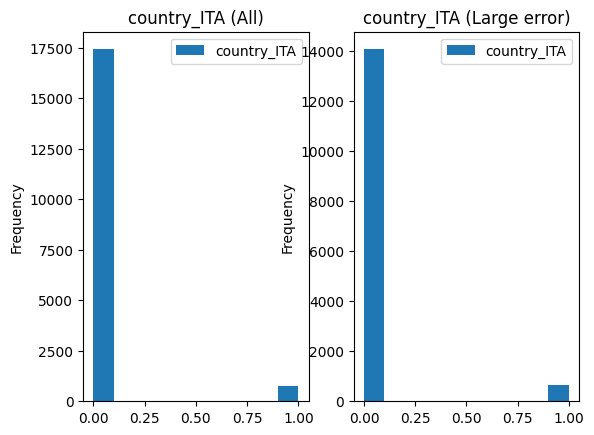

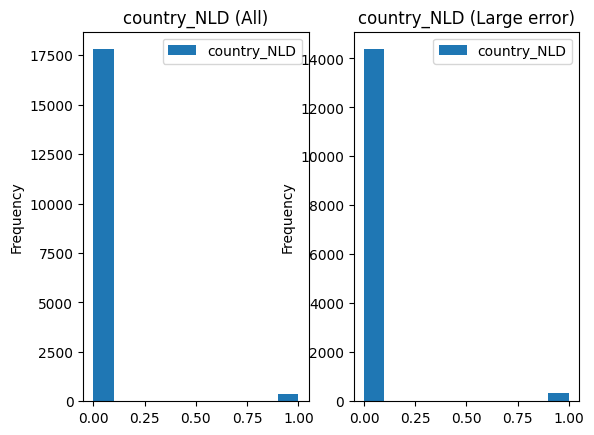

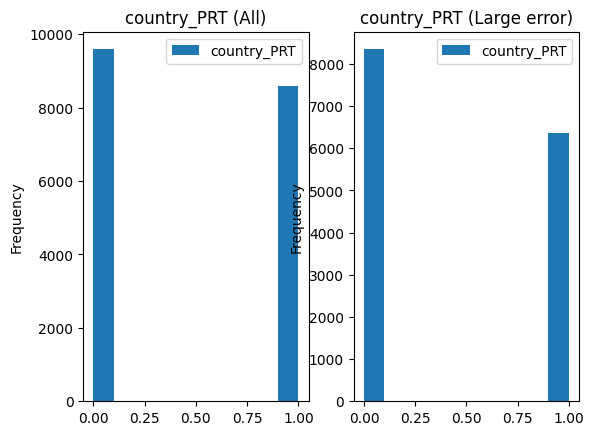

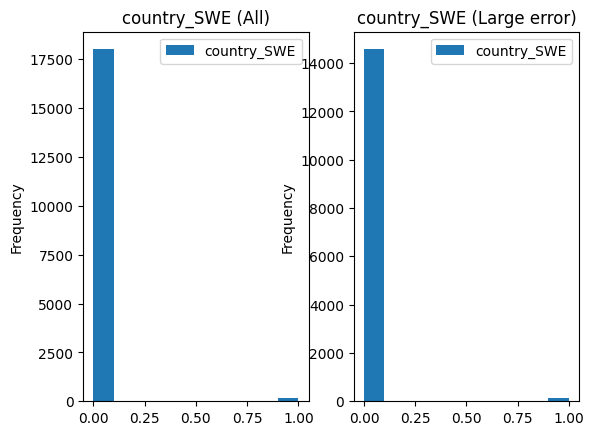

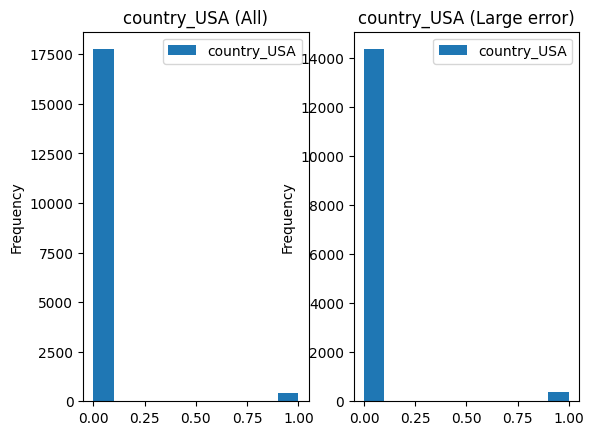

In [ ]:
import matplotlib.pyplot as plt
for column in X_test.columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  maindf_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  maindf_with_predictions[maindf_with_predictions.pred_diff > 2].plot(kind='hist', y=column, title=f'{column} (Large error)', ax=ax2)

## **cnn**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

In [ ]:
X = maindf_c.drop(columns='adr')
y = maindf_c.adr

In [ ]:
X_scaled = maindf_scaled.drop(columns='adr')
y_scaled = maindf_scaled.is_canceled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
import tensorflow as tf
from tensorflow import keras

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([min(history.history['val_mae']),max(history.history['val_mae'])])
  plt.xlim([0,20])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim([-10, 100])
  plt.ylim([-30, 30])
  _ = plt.plot([-10, 10],[-10,10])

In [ ]:
EPOCHS = 20

history_scaled = model.fit(X_train_scaled, y_train_scaled, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
evaluate(model, X_test_scaled, y_test_scaled)

In [ ]:
plot_history(history_scaled)

In [ ]:
# nicht skalierte Daten

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([20,max(history.history['val_mae'])])
  plt.xlim([0,50])

In [ ]:
EPOCHS = 50

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
plot_history(history)

> Aus der Grafik können wir erkennen, dass der Mean Absolute Error bei ~24€ liegt.

In [ ]:
def build_conv1D_model():

  n_timesteps = X_train.shape[1]
  n_features  = 1
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

In [ ]:
[loss, mae] = model_conv1D.evaluate(X_test, y_test, verbose=0)
print(f'Mean Abs Error (test data): {mae}')

In [ ]:
test_predictions = model_conv1D.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)

### **Optimizer: SGD**

In [ ]:
from keras.optimizers import SGD

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = SGD(lr=0.01, momentum=0.9)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

In [ ]:
EPOCHS = 50

history_sdg = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

### **Optimizer: Adam**

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([min(history.history['val_mae'])-2,max(history.history['val_mae'])+2])
  plt.xlim([0,50])

In [ ]:
from keras.optimizers import Adam

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = Adam()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

In [ ]:
EPOCHS = 50

history_adam = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
evaluate(model, X_test, y_test)

In [ ]:
plot_history(history_adam)

In [ ]:
def build_conv1D_model():

  n_timesteps = X_train.shape[1]
  n_features  = 1
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = Adam()

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

In [ ]:
[loss, mae] = model_conv1D.evaluate(X_test, y_test, verbose=0)
print(f'Mean Abs Error (test data): {mae}')

In [ ]:
test_predictions = model_conv1D.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)